Описание данных
wellName Название скважины

datasetName Название набора данных

MD Измеренная глубина

BK Боковой каротаж (сопротивление)

Facies Фация (свойство)

GR Гамма-каротаж

LIT Литология

NKTB Нейтронный каротаж

SP Метод потенциалов собственной поляризации

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и плотных породах на большом интервале

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и коллекторах на большом интервале

Нужно определять фации в коллеторах (LIT = 4)

1 – глина

2 – алевролит

5- плотная порода

6 - уголь

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и плотных породах на большом интервале

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и коллекторах на большом интервале, но не выше 2000 м (MD>2000)

Самые основные конечно – GR и SP, их форму геологи учитывают для определения условий осадконакопления, можно будет попробовать оценить форму кривых, а не значения параметра) Единственный нюанс – пока в таблице всего 19 скважин, но фации в них выделены наиболее уверенно. Ну и судя по всему, информация с MD < 2000 не принципиальна

SP (каротаж естественной поляризации)
GR (гамма каротаж)
DT (акустический каротаж)
Density (плотностной каротаж)

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import lasio
from os import listdir
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from IPython.display import display, clear_output
from sklearn.model_selection import StratifiedKFold
import talib
%matplotlib inline

In [ ]:
pip install talib

In [2]:
def get_for_learn_clean_df(statistic_df):
    feature = statistic_df.copy()
    del feature['datasetName']
    #feature = feature[feature["Facies"] >= -999]
    feature = feature[feature["BK"] >= -999]
    feature = feature[feature["SP"] >= -999]
    return feature


for_ml = get_for_learn_clean_df(pd.read_csv('DATATRAIN18+LAYER.csv', sep=';'))
display(for_ml.describe())
display(for_ml)
display(for_ml[for_ml["Facies"] > -999].describe())

MD           BK        Facies            GR           LIT  \
count  69846.000000  69846.00000  69846.000000  69846.000000  69846.000000   
mean    2146.093572     16.88084  -9575.889128   -942.107587  -7686.804384   
std      402.355621    194.48259   2013.442132   2937.741651   4216.454069   
min      721.000000     -6.90000  -9999.000000  -9999.000000  -9999.000000   
25%     1892.000000      5.19000  -9999.000000      6.960000  -9999.000000   
50%     2189.600000      7.02000  -9999.000000      9.194000  -9999.000000   
75%     2455.800000      9.50000  -9999.000000     11.660000  -9999.000000   
max     3093.000000  22739.52000     12.000000    142.370000      6.000000   

               NKTB            SP  
count  69846.000000  69846.000000  
mean    -943.411154    107.161288  
std     2928.513258     39.107406  
min    -9999.000000     -1.588982  
25%        2.770405     82.653728  
50%        3.483779    105.993450  
75%        4.080404    123.194050  
max       14.500000    578.255500

wellName      MD       BK  Facies      GR  LAYER   LIT      NKTB  \
0       spk1521  2011.0    4.420   -9999  13.600  -9999 -9999  2.968678   
1       spk1521  2011.2    4.300   -9999  13.510  -9999 -9999  2.937724   
2       spk1521  2011.4    4.310   -9999  13.170  -9999 -9999  2.973814   
3       spk1521  2011.6    4.280   -9999  13.030  -9999 -9999  2.989185   
4       spk1521  2011.8    4.260   -9999  12.940  -9999 -9999  2.968678   
5       spk1521  2012.0    4.410   -9999  12.640  -9999 -9999  3.024832   
6       spk1521  2012.2    4.500   -9999  12.610  -9999 -9999  3.055148   
7       spk1521  2012.4    5.000   -9999  12.930  -9999 -9999  3.105200   
8       spk1521  2012.6    4.750   -9999  13.440  -9999 -9999  3.139893   
9       spk1521  2012.8    4.590   -9999  13.410  -9999 -9999  3.115140   
10      spk1521  2013.0    4.630   -9999  13.230  -9999 -9999  3.134954   
11      spk1521  2013.2    4.980   -9999  12.770  -9999 -9999  3.134954   
12      spk1521  2013.4    5.020   -9999  12.370  -9999 -9999  3.100220   
13      spk1521  2013.6    4.300   -9999  12.090  -9999 -9999  3.024832   
14      spk1521  2013.8    3.890   -9999  12.330  -9999 -9999  3.045067   
15      spk1521  2014.0    3.740   -9999  12.810  -9999 -9999  3.125058   
16      spk1521  2014.2    3.930   -9999  13.390  -9999 -9999  3.203604   
17      spk1521  2014.4    4.180   -9999  13.720  -9999 -9999  3.188983   
18      spk1521  2014.6    4.460   -9999  14.300  -9999 -9999  3.065205   
19      spk1521  2014.8    4.500   -9999  14.750  -9999 -9999  3.080247   
20      spk1521  2015.0    4.420   -9999  14.560  -9999 -9999  3.154678   
21      spk1521  2015.2    4.270   -9999  14.230  -9999 -9999  3.164507   
22      spk1521  2015.4    4.000   -9999  14.300  -9999 -9999  3.110173   
23      spk1521  2015.6    4.120   -9999  14.250  -9999 -9999  3.100220   
24      spk1521  2015.8    4.280   -9999  14.000  -9999 -9999  3.154678   
25      spk1521  2016.0    4.180   -9999  14.090  -9999 -9999  3.184098   
26      spk1521  2016.2    4.210   -9999  14.130  -9999 -9999  3.188983   
27      spk1521  2016.4    4.250   -9999  13.940  -9999 -9999  3.115140   
28      spk1521  2016.6    4.240   -9999  13.680  -9999 -9999  3.060180   
29      spk1521  2016.8    4.140   -9999  13.180  -9999 -9999  3.019758   
...         ...     ...      ...     ...     ...    ...   ...       ...   
125038  spk432R  2678.2   11.835   -9999   9.725    UV3     1  4.011883   
125039  spk432R  2678.4   12.405   -9999  12.645    UV3     1  3.459317   
125040  spk432R  2678.6   17.880   -9999  13.365    UV3     1  3.301441   
125041  spk432R  2678.8   18.137   -9999  11.735    UV3     1  3.465297   
125042  spk432R  2679.0   13.233   -9999  10.627    UV3     1  3.839057   
125043  spk432R  2679.2   13.055   -9999  10.746    UV3     1  4.188297   
125044  spk432R  2679.4   12.781   -9999  12.202    UV3     1  3.759521   
125045  spk432R  2679.6   17.643   -9999  13.981    UV3     1  3.381576   
125046  spk432R  2679.8   18.698   -9999  13.490    UV3     1  3.251806   
125047  spk432R  2680.0   15.659   -9999  11.812    UV3     1  3.999325   
125048  spk432R  2680.2   14.257   -9999  10.172    UV3     6  3.128017   
125049  spk432R  2680.4   16.439   -9999   8.770    UV3     6  2.544355   
125050  spk432R  2680.6   64.538   -9999   9.315    UV3     6  2.314718   
125051  spk432R  2680.8   21.523   -9999  12.135    UV3     6  2.745886   
125052  spk432R  2681.0   11.473   -9999  13.845    UV3     1  4.140456   
125053  spk432R  2681.2    9.725   -9999  13.083    UV3     1  4.608701   
125054  spk432R  2681.4    7.780   -9999  12.281    UV3     1  4.175141   
125055  spk432R  2681.6    9.353   -9999  10.920    UV3     2  4.329429   
125056  spk432R  2681.8    9.295   -9999  10.729    UV3     2  4.737274   
125057  spk432R  2682.0    9.345   -9999  10.200    UV3     2  4.988441   
125058  spk432R  2682.2    9.935   -9999   8.960    UV3     4  4.749235   
125059  spk432R  2682.4   10.619

MD           BK      Facies           GR          LIT  \
count  2954.000000  2954.000000  2954.00000  2954.000000  2954.000000   
mean   2606.556364    10.946255     5.26608  -617.385604  -126.428910   
std     127.306556    11.162536     2.38241  2425.357626  1127.203192   
min    2507.600000     3.414000     0.00000 -9999.000000 -9999.000000   
25%    2547.600000     6.800000     5.00000     6.810000     1.000000   
50%    2568.200000     8.600000     5.00000     8.766500     1.000000   
75%    2595.600000    11.700000     7.00000    10.902250     4.000000   
max    3086.200000   231.100000    12.00000    18.340000     5.000000   

              NKTB           SP  
count  2954.000000  2954.000000  
mean   -622.073894   112.325442  
std    2424.144060    32.675092  
min   -9999.000000    49.395160  
25%       3.760663    93.534067  
50%       4.237521   108.352350  
75%       4.764340   124.523150  
max       8.589926   207.469100

In [3]:
def get_well_with_last_features(well, count_features, step_md):
    def get_features(depth_last, well):
        last_features = well[well['MD'] == depth_last]
        return last_features

    def add_feature_column_last(well_copy, max_count, name):
        for i in range(step_md, max_count, step_md):
            well_copy[name + '_last_' + str(i)] = -9999

    def add_feature_column_next(well_copy, max_count, name):
        for i in range(step_md, max_count, step_md):
            well_copy[name + '_next_' + str(i)] = -9999

    max_count = count_features
    well_copy = well.copy()
    add_feature_column_last(well_copy, max_count, 'GR')
    add_feature_column_last(well_copy, max_count, 'SP')
    add_feature_column_last(well_copy, max_count, 'BK')
    add_feature_column_last(well_copy, max_count, 'NKTB')

    add_feature_column_next(well_copy, max_count, 'GR')
    add_feature_column_next(well_copy, max_count, 'SP')
    add_feature_column_next(well_copy, max_count, 'BK')
    add_feature_column_next(well_copy, max_count, 'NKTB')

    for index, row in well_copy.iterrows():
        curent_depth = row['MD']
        for i in range(step_md, max_count, step_md):

            last = get_features(curent_depth - i, well_copy)
            if last.empty:
                last = get_features(curent_depth - i + 0.4, well_copy)
            if last.empty:
                last = get_features(curent_depth - i + 0.6, well_copy)
            if last.empty:
                last = get_features(curent_depth - i + 0.8, well_copy)
            if last.empty:
                last = get_features(curent_depth - i + 1, well_copy)
            if last.empty:
                last = get_features(curent_depth - i + 1.2, well_copy)

            if not last.empty:
                well_copy.loc[index, 'GR_last_' + str(i)] = last['GR'].iloc[0]
                well_copy.loc[index, 'BK_last_' + str(i)] = last['BK'].iloc[0]
                well_copy.loc[index, 'SP_last_' + str(i)] = last['SP'].iloc[0]
                well_copy.loc[index, 'NKTB_last_' + str(i)] = last['NKTB'].iloc[0]

            next_d = get_features(curent_depth + i, well_copy)
            if next_d.empty:
                next_d = get_features(curent_depth + i - 0.4, well_copy)
            if next_d.empty:
                next_d = get_features(curent_depth + i - 0.6, well_copy)
            if next_d.empty:
                next_d = get_features(curent_depth + i - 0.8, well_copy)
            if next_d.empty:
                next_d = get_features(curent_depth + i - 1, well_copy)
            if next_d.empty:
                next_d = get_features(curent_depth + i - 1.2, well_copy)

            if not next_d.empty:
                well_copy.loc[index, 'GR_next_' + str(i)] = next_d['GR'].iloc[0]
                well_copy.loc[index, 'BK_next_' + str(i)] = next_d['BK'].iloc[0]
                well_copy.loc[index, 'SP_next_' + str(i)] = next_d['SP'].iloc[0]
                well_copy.loc[index, 'NKTB_next_' + str(i)] = next_d['NKTB'].iloc[0]

    return well_copy


def get_preprocessing_well_df(all_well_df):
    from sklearn import preprocessing
    from sklearn_pandas import DataFrameMapper

    wall_names = all_well_df['wellName'].unique()
    print(wall_names)
    wells = []
    for name in wall_names:
        well = all_well_df[all_well_df['wellName'] == name]
        well_with_new_features = get_well_with_last_features(well, count_features=18, step_md=3)
        print(well_with_new_features)
        wells.append(well_with_new_features)
    return pd.concat(wells)


def getPreprocessing(df):
    from sklearn import preprocessing
    return preprocessing.StandardScaler().fit_transform(df)


def getNormalize(df):
    from sklearn import preprocessing
    return preprocessing.MinMaxScaler().fit_transform(df)


for_ml_preprocessing = get_preprocessing_well_df(for_ml)

['spk1521' 'spk1527' 'spk1769' 'spk400' 'spk402' 'spk403' 'spk405R'
 'spk406R' 'spk409R' 'spk420R' 'spk424R' 'spk426R' 'spk428R' 'spk429L'
 'spk432R']
     wellName      MD    BK  Facies     GR  LAYER   LIT      NKTB      SP  \
0     spk1521  2011.0  4.42   -9999  13.60  -9999 -9999  2.968678   97.41   
1     spk1521  2011.2  4.30   -9999  13.51  -9999 -9999  2.937724   97.02   
2     spk1521  2011.4  4.31   -9999  13.17  -9999 -9999  2.973814   97.57   
3     spk1521  2011.6  4.28   -9999  13.03  -9999 -9999  2.989185   97.86   
4     spk1521  2011.8  4.26   -9999  12.94  -9999 -9999  2.968678   98.15   
5     spk1521  2012.0  4.41   -9999  12.64  -9999 -9999  3.024832   97.77   
6     spk1521  2012.2  4.50   -9999  12.61  -9999 -9999  3.055148   97.45   
7     spk1521  2012.4  5.00   -9999  12.93  -9999 -9999  3.105200   98.63   
8     spk1521  2012.6  4.75   -9999  13.44  -9999 -9999  3.139893   99.34   
9     spk1521  2012.8  4.59   -9999  13.41  -9999 -9999  3.115140  100.31   
10

      wellName      MD     BK  Facies       GR  LAYER   LIT     NKTB     SP  \
14271  spk1527  1772.0   3.63   -9999 -9999.00  -9999 -9999 -9999.00  56.26   
14272  spk1527  1772.2   3.61   -9999 -9999.00  -9999 -9999 -9999.00  59.17   
14273  spk1527  1772.4   3.68   -9999 -9999.00  -9999 -9999 -9999.00  58.58   
14274  spk1527  1772.6   3.72   -9999 -9999.00  -9999 -9999 -9999.00  58.53   
14275  spk1527  1772.8   3.80   -9999 -9999.00  -9999 -9999 -9999.00  58.49   
14276  spk1527  1773.0   3.86   -9999 -9999.00  -9999 -9999 -9999.00  58.60   
14277  spk1527  1773.2   3.86   -9999     5.13  -9999 -9999     2.94  56.69   
14278  spk1527  1773.4   3.83   -9999     5.26  -9999 -9999     2.93  57.63   
14279  spk1527  1773.6   3.82   -9999     5.40  -9999 -9999     3.05  60.96   
14280  spk1527  1773.8   3.90   -9999     5.50  -9999 -9999     3.08  62.58   
14281  spk1527  1774.0   4.05   -9999     5.70  -9999 -9999     3.12  64.11   
14282  spk1527  1774.2   4.03   -9999     5.95  -999

      wellName      MD       BK  Facies       GR  LAYER   LIT     NKTB  \
27539  spk1769  1655.0     5.41   -9999     6.03  -9999     4     2.16   
27540  spk1769  1655.2     5.05   -9999     5.77  -9999     4     2.04   
27541  spk1769  1655.4     5.28   -9999     5.76  -9999     4     2.07   
27542  spk1769  1655.6     4.89   -9999     5.60  -9999     4     2.21   
27543  spk1769  1655.8     4.61   -9999     4.95  -9999     4     2.05   
27544  spk1769  1656.0     4.20   -9999     4.30  -9999     4     1.91   
27545  spk1769  1656.2     5.01   -9999     4.10  -9999     4     2.23   
27546  spk1769  1656.4     5.19   -9999     4.67  -9999     4     2.46   
27547  spk1769  1656.6     5.18   -9999     5.57  -9999     4     2.41   
27548  spk1769  1656.8     5.16   -9999     5.94  -9999     4     2.37   
27549  spk1769  1657.0     5.19   -9999     5.86  -9999     4     2.36   
27550  spk1769  1657.2     5.04   -9999     5.65  -9999     4     2.42   
27551  spk1769  1657.4     5.07   -999

      wellName      MD    BK  Facies     GR  LAYER   LIT      NKTB         SP  \
32687   spk400  1644.2  7.66   -9999  7.600  -9999 -9999  3.113234   86.62780   
32688   spk400  1644.3  7.69   -9999  7.430  -9999 -9999  3.106535   87.09280   
32689   spk400  1644.4  7.73   -9999  7.260  -9999 -9999  3.099837   87.55780   
32690   spk400  1644.5  7.73   -9999  7.260  -9999 -9999  3.073041   88.07780   
32691   spk400  1644.6  7.73   -9999  7.260  -9999 -9999  3.046246   88.59780   
32692   spk400  1644.7  7.78   -9999  7.225  -9999 -9999  3.106535   88.94780   
32693   spk400  1644.8  7.82   -9999  7.190  -9999 -9999  3.166824   89.29780   
32694   spk400  1644.9  7.78   -9999  7.165  -9999 -9999  3.180222   88.98780   
32695   spk400  1645.0  7.73   -9999  7.140  -9999 -9999  3.193619   88.67780   
32696   spk400  1645.1  7.78   -9999  6.970  -9999 -9999  3.220414   88.24280   
32697   spk400  1645.2  7.82   -9999  6.800  -9999 -9999  3.247210   87.80780   
32698   spk400  1645.3  7.82

      wellName      MD     BK  Facies       GR  LAYER   LIT     NKTB  \
42066   spk402  1640.0   7.12   -9999     5.98  -9999 -9999     2.14   
42067   spk402  1640.2   6.55   -9999     5.99  -9999 -9999     2.15   
42068   spk402  1640.4   6.48   -9999     5.94  -9999 -9999     2.17   
42069   spk402  1640.6   6.55   -9999     5.70  -9999 -9999     2.19   
42070   spk402  1640.8   6.80   -9999     5.58  -9999 -9999     2.20   
42071   spk402  1641.0   6.99   -9999     5.73  -9999 -9999     2.22   
42072   spk402  1641.2   6.99   -9999     5.84  -9999 -9999     2.26   
42073   spk402  1641.4   7.12   -9999     6.08  -9999 -9999     2.23   
42074   spk402  1641.6   7.67   -9999     5.41  -9999 -9999     2.14   
42075   spk402  1641.8   7.05   -9999     4.92  -9999 -9999     2.04   
42076   spk402  1642.0   6.14   -9999     4.97  -9999 -9999     1.95   
42077   spk402  1642.2   5.97   -9999     5.06  -9999 -9999     1.95   
42078   spk402  1642.4   5.43   -9999     5.06  -9999 -9999     

      wellName      MD    BK  Facies       GR  LAYER   LIT         NKTB  \
46677   spk403  1640.0  10.0   -9999     7.91  -9999 -9999     2.868599   
46678   spk403  1640.2   9.9   -9999     8.10  -9999 -9999     2.754603   
46679   spk403  1640.4   9.7   -9999     8.12  -9999 -9999     2.693220   
46680   spk403  1640.6   9.6   -9999     7.95  -9999 -9999     2.631837   
46681   spk403  1640.8   9.6   -9999     7.63  -9999 -9999     2.587993   
46682   spk403  1641.0   9.6   -9999     7.68  -9999 -9999     2.587993   
46683   spk403  1641.2   9.6   -9999     7.82  -9999 -9999     2.605531   
46684   spk403  1641.4   9.2   -9999     7.72  -9999 -9999     2.587993   
46685   spk403  1641.6   9.1   -9999     7.41  -9999 -9999     2.658144   
46686   spk403  1641.8   9.1   -9999     7.86  -9999 -9999     2.684451   
46687   spk403  1642.0   9.1   -9999     8.15  -9999 -9999     2.570455   
46688   spk403  1642.2   9.1   -9999     8.05  -9999 -9999     2.579224   
46689   spk403  1642.4   

      wellName      MD    BK  Facies    GR  LAYER   LIT    NKTB         SP  \
51885  spk405R  1643.4   4.1   -9999  11.5  -9999 -9999  2.6275   89.36863   
51886  spk405R  1643.6   6.1   -9999  11.9  -9999 -9999  2.5750   87.76863   
51887  spk405R  1643.8   7.2   -9999  11.9  -9999 -9999  2.4475   93.76863   
51888  spk405R  1644.0   7.0   -9999  12.2  -9999 -9999  2.5600  100.96860   
51889  spk405R  1644.2   6.7   -9999  11.5  -9999 -9999  2.5825  107.56860   
51890  spk405R  1644.4   6.5   -9999  11.2  -9999 -9999  2.6050  115.16860   
51891  spk405R  1644.6   6.5   -9999  11.9  -9999 -9999  2.5750  119.86860   
51892  spk405R  1644.8   6.5   -9999  11.9  -9999 -9999  2.6050  122.06860   
51893  spk405R  1645.0   6.5   -9999  12.2  -9999 -9999  2.5975  122.96860   
51894  spk405R  1645.2   6.2   -9999  12.2  -9999 -9999  2.6425  123.96860   
51895  spk405R  1645.4   5.8   -9999  12.2  -9999 -9999  2.5525  124.26860   
51896  spk405R  1645.6   5.8   -9999  11.9  -9999 -9999  2.5600 

      wellName      MD     BK  Facies    GR  LAYER   LIT      NKTB        SP  \
56844  spk406R  1636.0    6.9   -9999  10.1  -9999 -9999  3.085920  46.47830   
56845  spk406R  1636.2    7.2   -9999  10.6  -9999 -9999  2.794851  42.20830   
56846  spk406R  1636.4    7.8   -9999  10.8  -9999 -9999  2.713999  40.56830   
56847  spk406R  1636.6    8.5   -9999  11.1  -9999 -9999  2.625061  40.44830   
56848  spk406R  1636.8    8.9   -9999  10.7  -9999 -9999  2.738254  40.69830   
56849  spk406R  1637.0    9.1   -9999  10.5  -9999 -9999  2.843363  40.19830   
56850  spk406R  1637.2    9.1   -9999  10.4  -9999 -9999  2.916130  38.68830   
56851  spk406R  1637.4    9.4   -9999  10.0  -9999 -9999  3.085920  37.92830   
56852  spk406R  1637.6   10.1   -9999   9.9  -9999 -9999  3.150602  39.94830   
56853  spk406R  1637.8   10.9   -9999  10.2  -9999 -9999  3.215284  44.78830   
56854  spk406R  1638.0   11.8   -9999  10.2  -9999 -9999  3.360818  50.56830   
56855  spk406R  1638.2   17.4   -9999   

      wellName      MD     BK  Facies     GR  LAYER   LIT      NKTB  \
62050  spk409R  1660.0    5.9   -9999   7.44  -9999 -9999  2.900339   
62051  spk409R  1660.2    5.6   -9999   7.44  -9999 -9999  2.946643   
62052  spk409R  1660.4    5.6   -9999   6.92  -9999 -9999  2.918860   
62053  spk409R  1660.6    6.1   -9999   7.44  -9999 -9999  2.918860   
62054  spk409R  1660.8    6.4   -9999   7.04  -9999 -9999  2.872556   
62055  spk409R  1661.0    6.7   -9999   7.20  -9999 -9999  2.881817   
62056  spk409R  1661.2    6.2   -9999   7.44  -9999 -9999  2.872556   
62057  spk409R  1661.4    7.0   -9999   7.28  -9999 -9999  2.983687   
62058  spk409R  1661.6    6.1   -9999   7.04  -9999 -9999  3.039253   
62059  spk409R  1661.8    5.5   -9999   7.24  -9999 -9999  3.067036   
62060  spk409R  1662.0    5.2   -9999   7.76  -9999 -9999  3.122602   
62061  spk409R  1662.2    5.9   -9999   7.92  -9999 -9999  3.242994   
62062  spk409R  1662.4    7.2   -9999   6.68  -9999 -9999  3.363386   
62063 

      wellName      MD     BK  Facies     GR  LAYER   LIT      NKTB  \
66996  spk420R  1665.0   8.42   -9999   9.28  -9999 -9999  2.917578   
66997  spk420R  1665.2   8.89   -9999   9.23  -9999 -9999  2.840251   
66998  spk420R  1665.4   8.07   -9999   9.33  -9999 -9999  2.840251   
66999  spk420R  1665.6   7.49   -9999   9.62  -9999 -9999  2.963975   
67000  spk420R  1665.8   7.96   -9999   9.72  -9999 -9999  2.994906   
67001  spk420R  1666.0   8.07   -9999   9.61  -9999 -9999  3.033569   
67002  spk420R  1666.2   8.19   -9999   9.00  -9999 -9999  3.025836   
67003  spk420R  1666.4   8.30   -9999   9.40  -9999 -9999  3.018104   
67004  spk420R  1666.6   8.19   -9999   9.14  -9999 -9999  3.072233   
67005  spk420R  1666.8   8.30   -9999   8.65  -9999 -9999  3.002638   
67006  spk420R  1667.0   8.30   -9999   8.55  -9999 -9999  3.018104   
67007  spk420R  1667.2   8.07   -9999   8.53  -9999 -9999  3.172758   
67008  spk420R  1667.4   8.65   -9999   8.54  -9999 -9999  3.250085   
67009 

      wellName      MD         BK  Facies      GR  LAYER   LIT      NKTB  \
84081  spk424R  2470.0  11.643000   -9999  10.138  -9999 -9999  4.765429   
84082  spk424R  2470.2   9.149000   -9999  10.186  -9999 -9999  4.433780   
84083  spk424R  2470.4  10.275000   -9999  10.904  -9999 -9999  4.426570   
84084  spk424R  2470.6  10.494000   -9999   9.652  -9999 -9999  4.184766   
84085  spk424R  2470.8   8.392000   -9999  10.684  -9999 -9999  4.268510   
84086  spk424R  2471.0  10.526000   -9999  10.282  -9999 -9999  4.279047   
84087  spk424R  2471.2  11.132000   -9999   8.626  -9999 -9999  4.579084   
84088  spk424R  2471.4  11.061000   -9999   9.363  -9999 -9999  4.472601   
84089  spk424R  2471.6  13.083000   -9999  10.709  -9999 -9999  4.094367   
84090  spk424R  2471.8  13.517000   -9999   9.833  -9999 -9999  4.433780   
84091  spk424R  2472.0  14.713000   -9999   9.740  -9999 -9999  4.279047   
84092  spk424R  2472.2  15.730000   -9999   8.890  -9999 -9999  4.284039   
84093  spk42

      wellName      MD          BK  Facies      GR  LAYER   LIT      NKTB  \
93254  spk426R  2150.0  335.156100   -9999   7.110  -9999 -9999  4.281439   
93255  spk426R  2150.2  166.675000   -9999   6.515  -9999 -9999  4.300307   
93256  spk426R  2150.4  335.114000   -9999   6.429  -9999 -9999  4.446218   
93257  spk426R  2150.6  335.156100   -9999   6.321  -9999 -9999  4.297791   
93258  spk426R  2150.8  335.156100   -9999   5.982  -9999 -9999  4.924830   
93259  spk426R  2151.0  335.156100   -9999   6.683  -9999 -9999  4.695272   
93260  spk426R  2151.2  335.156100   -9999   6.820  -9999 -9999  4.474519   
93261  spk426R  2151.4  335.156100   -9999   6.589  -9999 -9999  4.669487   
93262  spk426R  2151.6  335.156100   -9999   6.231  -9999 -9999  4.729235   
93263  spk426R  2151.8  335.156100   -9999   6.508  -9999 -9999  5.088980   
93264  spk426R  2152.0  335.156100   -9999   6.962  -9999 -9999  5.076402   
93265  spk426R  2152.2  335.156100   -9999   6.629  -9999 -9999  4.880177   

       wellName      MD     BK  Facies       GR  LAYER   LIT   NKTB        SP  \
100481  spk428R  2450.0   9.96   -9999    12.11  -9999 -9999  3.973  136.4626   
100482  spk428R  2450.2   6.79   -9999    12.53  -9999 -9999  4.134  138.1826   
100483  spk428R  2450.4  10.57   -9999    12.35  -9999 -9999  4.344  134.3826   
100484  spk428R  2450.6  10.13   -9999    10.99  -9999 -9999  4.540  133.3326   
100485  spk428R  2450.8  11.09   -9999    10.01  -9999 -9999  4.911  132.5326   
100486  spk428R  2451.0  17.09   -9999     9.28  -9999 -9999  5.324  125.1626   
100487  spk428R  2451.2  18.88   -9999     8.97  -9999 -9999  5.240  118.4426   
100488  spk428R  2451.4  22.73   -9999     8.76  -9999 -9999  5.121  116.9026   
100489  spk428R  2451.6  18.37   -9999     8.88  -9999 -9999  5.240  118.1326   
100490  spk428R  2451.8  15.56   -9999     9.80  -9999 -9999  5.002  122.3126   
100491  spk428R  2452.0  10.55   -9999    11.50  -9999 -9999  4.386  133.0826   
100492  spk428R  2452.2   6.

       wellName      MD         BK  Facies      GR  LAYER   LIT      NKTB  \
113886  spk429L  2430.0   1.100000   -9999  12.420  -9999 -9999  3.845168   
113887  spk429L  2430.2   1.100000   -9999  11.749  -9999 -9999  3.747301   
113888  spk429L  2430.4   1.100000   -9999  11.383  -9999 -9999  3.812387   
113889  spk429L  2430.6   1.100000   -9999  11.407  -9999 -9999  3.956337   
113890  spk429L  2430.8   1.100000   -9999  11.889  -9999 -9999  3.660836   
113891  spk429L  2431.0   1.100000   -9999  10.998  -9999 -9999  3.696943   
113892  spk429L  2431.2   1.100000   -9999  11.093  -9999 -9999  3.771530   
113893  spk429L  2431.4   1.100000   -9999  10.768  -9999 -9999  3.721172   
113894  spk429L  2431.6   1.100000   -9999  11.455  -9999 -9999  3.837092   
113895  spk429L  2431.8   1.100000   -9999  10.898  -9999 -9999  3.781032   
113896  spk429L  2432.0   1.100000   -9999  10.964  -9999 -9999  3.710245   
113897  spk429L  2432.2   1.100000   -9999  10.936  -9999 -9999  3.669388   

       wellName      MD       BK  Facies        GR  LAYER   LIT         NKTB  \
115252  spk432R   721.0   18.350   -9999 -9999.000  -9999 -9999 -9999.000000   
115253  spk432R   721.2   18.260   -9999 -9999.000  -9999 -9999 -9999.000000   
115254  spk432R   721.4   18.090   -9999 -9999.000  -9999 -9999 -9999.000000   
115255  spk432R   721.6   18.120   -9999 -9999.000  -9999 -9999 -9999.000000   
115256  spk432R   721.8   18.150   -9999 -9999.000  -9999 -9999 -9999.000000   
115257  spk432R   722.0   18.050   -9999 -9999.000  -9999 -9999 -9999.000000   
115258  spk432R   722.2   18.190   -9999 -9999.000  -9999 -9999 -9999.000000   
115259  spk432R   722.4   17.980   -9999 -9999.000  -9999 -9999 -9999.000000   
115260  spk432R   722.6   17.750   -9999 -9999.000  -9999 -9999 -9999.000000   
115261  spk432R   722.8   17.680   -9999 -9999.000  -9999 -9999 -9999.000000   
115262  spk432R   723.0   18.150   -9999 -9999.000  -9999 -9999 -9999.000000   
115263  spk432R   723.2   18.150   -9999

In [4]:
for_ml_preprocessing.to_csv('for_ml_preprocessing_DATATRAIN18+LAYER.csv', index=False)

In [5]:
for_ml_preprocessing.describe()

MD           BK        Facies            GR           LIT  \
count  69846.000000  69846.00000  69846.000000  69846.000000  69846.000000   
mean    2146.093572     16.88084  -9575.889128   -942.107587  -7686.804384   
std      402.355621    194.48259   2013.442132   2937.741651   4216.454069   
min      721.000000     -6.90000  -9999.000000  -9999.000000  -9999.000000   
25%     1892.000000      5.19000  -9999.000000      6.960000  -9999.000000   
50%     2189.600000      7.02000  -9999.000000      9.194000  -9999.000000   
75%     2455.800000      9.50000  -9999.000000     11.660000  -9999.000000   
max     3093.000000  22739.52000     12.000000    142.370000      6.000000   

               NKTB            SP     GR_last_3     GR_last_6     GR_last_9  \
count  69846.000000  69846.000000  69846.000000  69846.000000  69846.000000   
mean    -943.411154    107.161288   -954.723006   -981.236606  -1009.181624   
std     2928.513258     39.107406   2955.057384   2990.961884   3028.095666   
min    -9999.000000     -1.588982  -9999.000000  -9999.000000  -9999.000000   
25%        2.770405     82.653728      6.940000      6.920000      6.890000   
50%        3.483779    105.993450      9.180000      9.160000      9.143500   
75%        4.080404    123.194050     11.644750     11.610000     11.600000   
max       14.500000    578.255500    142.370000    142.370000    142.370000   

       ...     BK_next_3     BK_next_6     BK_next_9    BK_next_12  \
count  ...  69846.000000  69846.000000  69846.000000  69846.000000   
mean   ...     -3.805416    -38.261540    -72.706244   -107.116189   
std    ...    501.009293    770.121128    965.812762   1127.008754   
min    ...  -9999.000000  -9999.000000  -9999.000000  -9999.000000   
25%    ...      5.180000      5.160000      5.140000      5.110000   
50%    ...      7.020000      7.000000      7.000000      7.000000   
75%    ...      9.500000      9.500000      9.470000      9.450000   
max    ...  22739.520000  22739.520000  22739.520000  22739.520000   

         BK_next_15   NKTB_next_3   NKTB_next_6   NKTB_next_9  NKTB_next_12  \
count  69846.000000  69846.000000  69846.000000  69846.000000  69846.000000   
mean    -141.497039   -964.747876   -996.969242  -1029.190357  -1061.411743   
std     1266.945221   2957.830674   3001.271332   3043.751135   3085.309601   
min    -9999.000000  -9999.000000  -9999.000000  -9999.000000  -9999.000000   
25%        5.100000      2.770000      2.760000      2.750000      2.740000   
50%        6.990000      3.482500      3.482067      3.480000      3.474518   
75%        9.440000      4.080000      4.078717      4.077857      4.077486   
max    22739.520000     14.500000     14.500000     14.500000     14.500000   

       NKTB_next_15  
count  69846.000000  
mean   -1093.632681  
std     3125.983719  
min    -9999.000000  
25%        2.733643  
50%        3.474012  
75%        4.076125  
max       14.500000  

[8 rows x 47 columns]

In [6]:
for_ml_preprocessing[for_ml_preprocessing["Facies"] > -999].describe()

MD           BK      Facies           GR          LIT  \
count  2954.000000  2954.000000  2954.00000  2954.000000  2954.000000   
mean   2606.556364    10.946255     5.26608  -617.385604  -126.428910   
std     127.306556    11.162536     2.38241  2425.357626  1127.203192   
min    2507.600000     3.414000     0.00000 -9999.000000 -9999.000000   
25%    2547.600000     6.800000     5.00000     6.810000     1.000000   
50%    2568.200000     8.600000     5.00000     8.766500     1.000000   
75%    2595.600000    11.700000     7.00000    10.902250     4.000000   
max    3086.200000   231.100000    12.00000    18.340000     5.000000   

              NKTB           SP    GR_last_3   GR_last_6    GR_last_9  ...  \
count  2954.000000  2954.000000  2954.000000  2954.00000  2954.000000  ...   
mean   -622.073894   112.325442  -616.826726  -607.49036  -586.778373  ...   
std    2424.144060    32.675092  2425.504690  2413.90662  2383.840686  ...   
min   -9999.000000    49.395160 -9999.000000 -9999.00000 -9999.000000  ...   
25%       3.760663    93.534067     6.810000     7.00250     7.280000  ...   
50%       4.237521   108.352350     8.900000     9.42300    10.073500  ...   
75%       4.764340   124.523150    11.490000    12.60000    14.196750  ...   
max       8.589926   207.469100    63.536000    86.15700   116.390000  ...   

         BK_next_3    BK_next_6    BK_next_9   BK_next_12   BK_next_15  \
count  2954.000000  2954.000000  2954.000000  2954.000000  2954.000000   
mean    -53.635771  -155.590864  -277.949341  -454.339708  -657.833816   
std     800.404259  1278.671704  1673.542892  2105.252433  2497.417941   
min   -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000   
25%       6.722500     6.610000     6.440000     6.300000     6.100000   
50%       8.343999     8.180000     7.900000     7.899000     7.704500   
75%      11.125250    10.800000    10.407500    10.164250     9.800000   
max     231.100000   231.100000   178.602997   178.602997   124.257000   

       NKTB_next_3  NKTB_next_6  NKTB_next_9  NKTB_next_12  NKTB_next_15  
count  2954.000000  2954.000000  2954.000000   2954.000000   2954.000000  
mean   -686.452463  -788.095367  -916.794198  -1059.027573  -1211.436392  
std    2536.826601  2702.086837  2892.810198   3083.703219   3269.042427  
min   -9999.000000 -9999.000000 -9999.000000  -9999.000000  -9999.000000  
25%       3.720276     3.676874     3.649998      3.622341      3.570000  
50%       4.170000     4.106434     4.090913      4.087720      4.064460  
75%       4.707885     4.649455     4.616450      4.603311      4.578765  
max       8.589926     8.589926     8.589926      8.589926      8.054000  

[8 rows x 47 columns]

In [7]:
def get_features_filtering(wells):
    well_copy = wells.copy()
    well_copy = well_copy[well_copy['Facies'] > -1]
    del well_copy['LAYER']
    for name_feature in well_copy.columns:
        if(name_feature != 'wellName' and name_feature != 'Facies'):
            print(name_feature)
            well_copy = well_copy[well_copy[name_feature] > -999]
    return well_copy.dropna()


for_ml_with_features = get_features_filtering(for_ml_preprocessing)
display(for_ml_with_features.describe())

MD
BK
GR
LIT
NKTB
SP
GR_last_3
GR_last_6
GR_last_9
GR_last_12
GR_last_15
SP_last_3
SP_last_6
SP_last_9
SP_last_12
SP_last_15
BK_last_3
BK_last_6
BK_last_9
BK_last_12
BK_last_15
NKTB_last_3
NKTB_last_6
NKTB_last_9
NKTB_last_12
NKTB_last_15
GR_next_3
GR_next_6
GR_next_9
GR_next_12
GR_next_15
SP_next_3
SP_next_6
SP_next_9
SP_next_12
SP_next_15
BK_next_3
BK_next_6
BK_next_9
BK_next_12
BK_next_15
NKTB_next_3
NKTB_next_6
NKTB_next_9
NKTB_next_12
NKTB_next_15


MD           BK       Facies           GR          LIT  \
count  2570.000000  2570.000000  2570.000000  2570.000000  2570.000000   
mean   2612.582023    11.060144     5.255253     9.505520     2.284825   
std     132.323474    11.580218     2.499401     2.947521     1.516935   
min    2507.600000     3.414000     0.000000     1.720000     1.000000   
25%    2549.625000     6.796250     5.000000     7.270000     1.000000   
50%    2569.900000     8.720000     5.000000     9.113500     1.000000   
75%    2600.200000    11.918750     7.000000    11.356000     4.000000   
max    3060.400000   231.100000    12.000000    18.190000     5.000000   

              NKTB           SP    GR_last_3    GR_last_6    GR_last_9  ...  \
count  2570.000000  2570.000000  2570.000000  2570.000000  2570.000000  ...   
mean      4.405120   111.447286    10.088230    12.703425    16.717358  ...   
std       0.797412    34.631894     4.666013    10.599069    17.180445  ...   
min       2.264484    49.395160     1.720000     1.720000     1.720000  ...   
25%       3.850650    89.696470     7.252250     7.435000     7.900000  ...   
50%       4.311158   106.208500     9.320000     9.860000    10.643000  ...   
75%       4.812580   123.552900    11.800000    13.067500    14.634250  ...   
max       8.589926   207.469100    63.536000    86.157000   116.390000  ...   

         BK_next_3    BK_next_6    BK_next_9   BK_next_12   BK_next_15  \
count  2570.000000  2570.000000  2570.000000  2570.000000  2570.000000   
mean     10.829332    10.479468    10.122471     9.855328     9.534010   
std      11.608015    11.042727     9.172270     8.646101     7.605867   
min       3.656000     3.656000     3.656000     3.656000     3.490000   
25%       6.716250     6.655750     6.500000     6.500000     6.427750   
50%       8.500000     8.300000     8.134000     8.070000     7.900000   
75%      11.370000    11.037500    10.715000    10.313000    10.047500   
max     231.100000   231.100000   178.602997   178.602997   124.257000   

       NKTB_next_3  NKTB_next_6  NKTB_next_9  NKTB_next_12  NKTB_next_15  
count  2570.000000  2570.000000  2570.000000   2570.000000   2570.000000  
mean      4.369293     4.313799     4.296959      4.282479      4.258109  
std       0.810598     0.780986     0.774427      0.778838      0.758561  
min       2.260000     2.200000     2.200000      2.040000      2.040000  
25%       3.814367     3.789353     3.780143      3.782653      3.788326  
50%       4.252026     4.209356     4.187612      4.195358      4.176691  
75%       4.767787     4.711486     4.688371      4.678713      4.647078  
max       8.589926     8.589926     8.589926      8.589926      8.054000  

[8 rows x 47 columns]

In [8]:
for_ml_with_features

wellName      MD      BK  Facies      GR  LIT      NKTB        SP  \
5044    spk1521  3019.8   8.040       8  12.410    5  4.431441  103.8600   
5045    spk1521  3020.0   7.940       8  11.610    5  4.680739  103.7900   
5046    spk1521  3020.2   9.900       8  11.460    5  4.794586  103.5300   
5047    spk1521  3020.4  13.320       8  11.200    5  4.816397  104.6900   
5048    spk1521  3020.6  14.990       8  11.380    5  4.809134  106.9300   
5049    spk1521  3020.8  17.660       8  12.050    5  4.827276  107.6500   
5050    spk1521  3021.0  15.780       8  12.880    1  4.702928  109.1200   
5051    spk1521  3021.2  10.720       8  14.640    1  4.454518  110.9100   
5052    spk1521  3021.4   8.010       8  16.860    1  4.171620  111.7100   
5053    spk1521  3021.6   9.350       8  17.110    1  4.159534  108.6500   
5054    spk1521  3021.8   9.820       8  15.290    1  4.392788  105.5000   
5055    spk1521  3022.0   9.100       8  13.680    1  4.492788  103.9600   
5056    spk1521  3022.2   9.610       8  13.100    1  4.545977  101.8300   
5057    spk1521  3022.4  11.600       8  12.050    4  4.598722  101.2800   
5058    spk1521  3022.6  12.570       8  10.520    4  4.654756  100.8000   
5059    spk1521  3022.8  13.280       8   9.800    4  4.750749   99.7600   
5060    spk1521  3023.0  14.150       8   9.450    4  4.830898   99.7500   
5061    spk1521  3023.2  12.930       8   9.340    4  4.761736   99.7900   
5062    spk1521  3023.4  11.980       8   9.360    4  4.848981  100.3300   
5063    spk1521  3023.6  10.840       8   9.510    4  4.945802  101.3400   
5064    spk1521  3023.8   9.270       8   9.860    4  4.938677  103.1400   
5065    spk1521  3024.0   9.530       8  10.050    4  4.952920  103.3000   
5066    spk1521  3024.2  10.600       8   9.920    4  4.885002  103.0600   
5067    spk1521  3024.4  12.060       8   9.660    4  4.834518  104.9400   
5068    spk1521  3024.6  12.560       8   9.570    4  4.725043  106.6800   
5069    spk1521  3024.8  20.060       8   9.810    4  4.557316  108.1000   
5070    spk1521  3025.0  14.120       8  10.460    4  4.385028  108.8100   
5071    spk1521  3025.2   8.860       5  11.380    1  4.187695  110.4000   
5072    spk1521  3025.4   7.060       5  12.610    1  3.941676  113.0200   
5073    spk1521  3025.6   9.410       5  13.610    1  3.648751  115.2400   
...         ...     ...     ...     ...     ...  ...       ...       ...   
124790  spk432R  2628.6   5.283       7  10.071    2  4.341987  167.0245   
124791  spk432R  2628.8   4.637       7  11.358    2  4.386240  167.5197   
124792  spk432R  2629.0   4.512       7  11.900    1  4.473550  169.2248   
124793  spk432R  2629.2   4.417       7  12.967    1  4.124907  170.3850   
124794  spk432R  2629.4   4.653       7  15.165    1  4.597937  170.7572   
124795  spk432R  2629.6   5.797       7  14.940    4  4.704982  164.9543   
124796  spk432R  2629.8   6.978       7  12.808    4  4.801860  155.7985   
124797  spk432R  2630.0   6.774       7  10.800    4  4.727706  148.8216   
124798  spk432R  2630.2   5.999       7   9.724    4  4.704982  145.4668   
124799  spk432R  2630.4   6.757       7   8.709    4  4.233746  149.0440   
124800  spk432R  2630.6   8.227       7   7.761    5  4.893954  155.1481   
124801  spk432R  2630.8   9.271       7   7.378    5  5.353230  161.0703   
124802  spk432R  2631.0   8.311       7   8.456    5  5.278478  163.4244   
124803  spk432R  2631.2   6.595       7   9.536    4  4.754019  161.4796   
124804  spk432R  2631.4   5.384       7   9.445    4  4.467570  156.9438   
124805  spk432R  2631.6   5.895       7   9.815    4  4.373682  152.9669   
124806  spk432R  2631.8   5.853       7  10.284    4  4.339595  148.9061   
124807  spk432R  2632.0   5.611       7  10.326    4  4.612289  147.9332   
124808  spk432R  2632.2   4.840       7  10.198    4  4.486108  150.3494   
124809  spk432R  2632.4   4.792       7  10.202    1  4.406572  155.5576   
124810  spk432R  2632.6   4.393       7  10.450    1  4

In [10]:
def get_for_learn_featres(for_all_feature_df):
    feature = for_all_feature_df.copy()
    del feature['Facies']
    del feature['wellName']
    del feature['LIT']
    del feature['MD']
    return feature


def get_for_learn_target_class(for_all_feature_df):
    target_class = for_all_feature_df.copy()
    target_class = target_class['Facies']#.apply(lambda x: float(x))
    return target_class

def get_log_features(for_all_feature_df):
    import math
    well_copy = for_all_feature_df.copy()
    for name_feature in well_copy.columns:
        if(name_feature != 'wellName' and name_feature != 'Facies'):
            print(name_feature)
            well_copy[name_feature] = well_copy[name_feature].apply(lambda x: math.log10(x))
    return well_copy

features_no_preprocessing = get_for_learn_featres(for_ml_with_features)#[for_ml_with_features['Facies'] != 5]
features = get_log_features(features_no_preprocessing)
target_facies = get_for_learn_target_class(for_ml_with_features)#[for_ml_with_features['Facies'] != 5]
#features = get_for_learn_featres(for_ml_with_features[for_ml_with_features['Facies'] != 5])
#target_facies = get_for_learn_target_class(for_ml_with_features[for_ml_with_features['Facies'] != 5])
display(features)


BK
GR
NKTB
SP
GR_last_3
GR_last_6
GR_last_9
GR_last_12
GR_last_15
SP_last_3
SP_last_6
SP_last_9
SP_last_12
SP_last_15
BK_last_3
BK_last_6
BK_last_9
BK_last_12
BK_last_15
NKTB_last_3
NKTB_last_6
NKTB_last_9
NKTB_last_12
NKTB_last_15
GR_next_3
GR_next_6
GR_next_9
GR_next_12
GR_next_15
SP_next_3
SP_next_6
SP_next_9
SP_next_12
SP_next_15
BK_next_3
BK_next_6
BK_next_9
BK_next_12
BK_next_15
NKTB_next_3
NKTB_next_6
NKTB_next_9
NKTB_next_12
NKTB_next_15


BK        GR      NKTB        SP  GR_last_3  GR_last_6  \
5044    0.905256  1.093772  0.646545  2.016448   1.687351   1.864155   
5045    0.899821  1.064832  0.670314  2.016156   1.670524   1.871981   
5046    0.995635  1.059185  0.680751  2.015066   1.633771   1.873495   
5047    1.124504  1.049218  0.682722  2.019905   1.541704   1.875351   
5048    1.175802  1.056142  0.682067  2.029100   1.393926   1.896085   
5049    1.246991  1.080987  0.683702  2.032014   1.252125   1.920436   
5050    1.198107  1.109916  0.672368  2.037904   1.112940   1.907089   
5051    1.030195  1.165541  0.648801  2.044971   0.998695   1.902492   
5052    0.903633  1.226858  0.620305  2.048092   0.959995   1.908807   
5053    0.970812  1.233250  0.619045  2.036030   1.013680   1.860518   
5054    0.992111  1.184407  0.642740  2.023252   1.106191   1.792322   
5055    0.959041  1.136086  0.652516  2.016866   1.156852   1.769377   
5056    0.982723  1.117271  0.657627  2.007876   1.152900   1.768564   
5057    1.064458  1.080987  0.662637  2.005524   1.132260   1.748653   
5058    1.099335  1.022016  0.667897  2.003461   1.120574   1.709863   
5059    1.123198  0.991226  0.676762  1.998956   1.093772   1.687351   
5060    1.150756  0.975432  0.684028  1.998913   1.064832   1.670524   
5061    1.111599  0.970347  0.677765  1.999087   1.059185   1.633771   
5062    1.078457  0.971276  0.685650  2.001431   1.049218   1.541704   
5063    1.035029  0.978181  0.694237  2.005781   1.056142   1.393926   
5064    0.967080  0.993877  0.693611  2.013427   1.080987   1.252125   
5065    0.979093  1.002166  0.694861  2.014100   1.109916   1.112940   
5066    1.025306  0.996512  0.688865  2.013090   1.165541   0.998695   
5067    1.081347  0.984977  0.684353  2.020941   1.226858   0.959995   
5068    1.098990  0.980912  0.674406  2.028083   1.233250   1.013680   
5069    1.302331  0.991669  0.658709  2.033826   1.184407   1.106191   
5070    1.149835  1.019532  0.641972  2.036669   1.136086   1.156852   
5071    0.947434  1.056142  0.621975  2.042969   1.117271   1.152900   
5072    0.848805  1.100715  0.595681  2.053155   1.080987   1.132260   
5073    0.973590  1.133858  0.562144  2.061603   1.022016   1.120574   
...          ...       ...       ...       ...        ...        ...   
124790  0.722881  1.003073  0.637689  2.222780   1.115244   1.026574   
124791  0.666237  1.055302  0.642092  2.224066   1.124569   1.059412   
124792  0.654369  1.075547  0.650652  2.228464   1.087710   1.079362   
124793  0.645127  1.112840  0.615414  2.231431   1.035510   1.071440   
124794  0.667733  1.180842  0.662563  2.232379   1.020900   1.059223   
124795  0.763203  1.174351  0.672558  2.217364   1.003891   1.075693   
124796  0.843731  1.107481  0.681409  2.192563   0.993436   1.094052   
124797  0.830845  1.033424  0.674650  2.172666   0.998739   1.070407   
124798  0.778079  0.987845  0.672558  2.162764   0.988068   1.013680   
124799  0.829754  0.939968  0.626725  2.173314   1.004665   0.952841   
124800  0.915241  0.889918  0.689660  2.190746   1.008259   0.953373   
124801  0.967127  0.867939  0.728616  2.207015   0.987353   1.004063   
124802  0.919653  0.927165  0.722509  2.213317   0.968249   1.051616   
124803  0.819215  0.979366  0.677061  2.208118   0.987890   1.102777   
124804  0.731105  0.975202  0.650071  2.195744   0.992907   1.120804   
124805  0.770484  0.991890  0.640847  2.184597   1.003073   1.115244   
124806  0.767379  1.012162  0.637449  2.172912   1.055302   1.124569   
124807  0.749040  1.013932  0.663917  2.170066   1.075547   1.087710   
124808  0.684845  1.008515  0.651870  2.177102   1.112840   1.035510   
124809  0.680517  1.008685  0.644101  2.191891   1.180842   1.020900   
124810  0.642761  1.019116  0.606123  2.210441   1.174351   1.003891   
124811  0.673574  1.076568  0.646745  2.235909   1.107481   0.993436   
124812  0.709948  1.115810  0.635229  2.242298   1.033424   0.998739   
124813  0.704922  1.134623  0.691883  2.251884   0.987

In [11]:
def p(target, labels):
    print('RMSE ошибка равна',mean_squared_error(target, labels))
    print(classification_report(target, labels))
    
def p_cross_val(model, train, labels):
    from sklearn.model_selection import StratifiedKFold
    
    print('cross_val_predict')
    skf = StratifiedKFold(n_splits=9)
    predicted = cross_val_predict(model, train, labels, cv=skf)
    print(classification_report(labels, predicted))
    
    #scores = cross_val_score(model, train, labels, cv=skf)
    #print("---cross_val_score---")
    #print("CV scores: {0}".format(scores))
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    

In [12]:
def logistic_regression(train, labels):
    print('logistic_regression')
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                        labels, random_state=18, test_size=0.3, stratify=labels)
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(random_state=18, 
                               solver="sag",
                               multi_class='multinomial',
                               max_iter=100)
    rfe = RFE(model, 10)
    rfe = rfe.fit(X_train, y_train)
    p(y_test, rfe.predict(X_test))
    p_cross_val(rfe, train, labels)
    return rfe


logistic_regression(features, target_facies)

logistic_regression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

RMSE ошибка равна 5.634241245136187
              precision    recall  f1-score   support

           0       0.71      0.24      0.36        70
           1       1.00      0.50      0.67        26
           3       0.00      0.00      0.00        25
           5       0.68      0.90      0.77       395
           7       0.56      0.59      0.58       190
           8       0.57      0.12      0.20        33
          12       0.00      0.00      0.00        32

   micro avg       0.65      0.65      0.65       771
   macro avg       0.50      0.34      0.37       771
weighted avg       0.61      0.65      0.60       771

cross_val_predict


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.51      0.15      0.23       233
           1       1.00      0.45      0.62        86
           3       0.00      0.00      0.00        85
           5       0.63      0.84      0.72      1316
           7       0.48      0.48      0.48       635
           8       0.32      0.22      0.26       110
          12       0.00      0.00      0.00       105

   micro avg       0.59      0.59      0.59      2570
   macro avg       0.42      0.31      0.33      2570
weighted avg       0.54      0.59      0.54      2570



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=18, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [13]:
def get_Ridge_GridSearchCV(train, labels):
    from sklearn.linear_model import RidgeClassifier
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                        labels, 
                                                        random_state=18, 
                                                        test_size=0.3, 
                                                        stratify=labels)

    ridge_model = RidgeClassifier(random_state=18)
    params = {}
    ridge_model_cv = GridSearchCV(ridge_model, params, cv = 5)
    ridge_model_cv.fit(X_train, y_train)
    
    p(y_test, ridge_model_cv.best_estimator_.predict(X_test).round())
    p_cross_val(ridge_model_cv.best_estimator_, train, labels)
    return ridge_model_cv


get_Ridge_GridSearchCV(features, target_facies)


RMSE ошибка равна 4.866407263294422
              precision    recall  f1-score   support

           0       0.75      0.13      0.22        70
           1       1.00      0.62      0.76        26
           3       0.00      0.00      0.00        25
           5       0.71      0.90      0.79       395
           7       0.65      0.78      0.71       190
           8       1.00      0.36      0.53        33
          12       1.00      0.03      0.06        32

   micro avg       0.70      0.70      0.70       771
   macro avg       0.73      0.40      0.44       771
weighted avg       0.71      0.70      0.65       771

cross_val_predict


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.59      0.10      0.18       233
           1       1.00      0.55      0.71        86
           3       0.00      0.00      0.00        85
           5       0.65      0.83      0.73      1316
           7       0.57      0.65      0.61       635
           8       0.56      0.34      0.42       110
          12       0.00      0.00      0.00       105

   micro avg       0.63      0.63      0.63      2570
   macro avg       0.48      0.35      0.38      2570
weighted avg       0.58      0.63      0.58      2570



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=18, solver='auto',
        tol=0.001),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
def get_KNeighborsClassifier(x ,target):
    X_train, X_test, y_train, y_test = train_test_split(x, target, train_size=0.7, stratify=target)
    for k in range(1,15):
        classifier = KNeighborsClassifier(n_neighbors=k, random_state=18)
        classifier.fit(X_train, y_train)
        print(" n_neighbors ")
        print(k)
        print(classification_report(y_test, classifier.predict(X_test)))
        predicted = cross_val_predict(classifier, x, target, cv=5)
        print(" cross_val_predict " + str(k) + ' neighbors ')
        print(classification_report(target, predicted))

get_KNeighborsClassifier(features, target_facies)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


TypeError: __init__() got an unexpected keyword argument 'random_state'

In [ ]:
def get_gradientBoostingClassifier_GridSearchCV(train, labels):
    from sklearn.ensemble import GradientBoostingClassifier
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.3, stratify=labels)
    reg = GradientBoostingClassifier(random_state = 18)
    params = {}
    reg_cv = GridSearchCV(reg, params, cv = 5)
    reg_cv.fit(X_train, y_train)
    
    p(y_test, reg_cv.best_estimator_.predict(X_test).round())
    p_cross_val(reg_cv.best_estimator_, train, labels)
    
    return reg

    
get_gradientBoostingClassifier_GridSearchCV(features, target_facies) 

In [ ]:
def get_gradientBoostingClassifier(train, labels):
    from sklearn.ensemble import GradientBoostingClassifier
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                        labels, 
                                                        random_state = 18, 
                                                        test_size = 0.3,
                                                        stratify=labels)
    reg = GradientBoostingClassifier(random_state = 18)
    reg.fit(X_train, y_train)
    p(y_test, reg.predict(X_test))
    p_cross_val(reg, train, labels)
    return reg

    
get_gradientBoostingClassifier(features, target_facies) 

In [ ]:
def get_randomForestRegressor(train, labels):
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.3)
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    
    reg = RandomForestClassifier(random_state = 18)
    params = {}
    cb_model = GridSearchCV(reg, params, cv = 5)
    cb_model.fit(X_train, y_train)
    
    pred_class_all = cb_model.predict(X_test)
    preds_proba_all = cb_model.predict_proba(X_test)
    
    p(y_test, cb_model.best_estimator_.predict(X_test).round())
    p_cross_val(cb_model.best_estimator_, train, labels)
    return cb_model.best_estimator_

get_randomForestRegressor(features, target_facies) 

In [ ]:
def get_randomForestRegressor(train, labels):
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.3, stratify=labels)
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    
    reg = RandomForestClassifier(random_state = 18)
    params = {}
    cb_model = GridSearchCV(reg, params, cv = 5)
    cb_model.fit(X_train, y_train)
    
    pred_class_all = cb_model.predict(X_test)
    preds_proba_all = cb_model.predict_proba(X_test)
    
    p(y_test, cb_model.best_estimator_.predict(X_test).round())
    p_cross_val(cb_model.best_estimator_, train, labels)
    return cb_model.best_estimator_

get_randomForestRegressor(features, target_facies) 

In [ ]:
def get_catBoost(train, labels):
    from catboost import CatBoostClassifier, Pool
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.3, stratify=labels)
    train_data = catboost_pool = Pool(X_train, 
                                 y_train)
    test_data = catboost_pool = Pool(X_test, 
                                     y_test)

    model = CatBoostClassifier(iterations=100,
                               loss_function='MultiClass',
                           logging_level='Silent',
                              task_type = "GPU")
    #train the model
    model.fit(train_data,use_best_model=True)
    preds_class = model.predict(test_data)
    preds_proba = model.predict_proba(test_data)
    p(y_test, preds_class)
    p_cross_val(model, train, labels)
    return model
    
get_catBoost(features, target_facies)

In [ ]:
def get_catBoost_GridSearchCV(train, labels):
    from catboost import CatBoostClassifier, Pool
    from sklearn.model_selection import StratifiedKFold
    
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.05, stratify=labels)
    train_data = catboost_pool = Pool(X_train, 
                                 y_train)
    test_data = catboost_pool = Pool(X_test, 
                                     y_test)

    
    model = CatBoostClassifier(iterations=100,
                               loss_function='MultiClass',
                           logging_level='Silent')
    parameters = {
                    'depth':[8,9,10],
                  'iterations'    : [108]
                 }
    skf = StratifiedKFold(n_splits=9)
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = skf, n_jobs=-1)
    grid.fit(X_train, y_train) 
    print(grid.best_params_)

    preds_class = grid.best_estimator_.predict(X_test, prediction_type="Class")


    p(y_test, preds_class)
    p_cross_val(grid.best_estimator_, train, labels)
    print(grid.best_params_)
    return grid.best_estimator_
    
catboost_GridSearchCV_model_best = get_catBoost_GridSearchCV(features, target_facies)

In [ ]:
def get_GradientBoostingClassifier(train, labels):
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.3, stratify=labels)
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingClassifier
    
    reg = GradientBoostingClassifier(random_state = 18)
    params = {}
    cb_model = GridSearchCV(reg, params, cv = 10)
    cb_model.fit(X_train, y_train)
    
    pred_class_all = cb_model.predict(X_test)
    preds_proba_all = cb_model.predict_proba(X_test)
    
    p(y_test, cb_model.best_estimator_.predict(X_test).round())
    model = p_cross_val(cb_model.best_estimator_, train, labels)
    p(y_test, model.predict(X_test).round())
    return cb_model.best_estimator_

get_GradientBoostingClassifier(features, target_facies) 

In [ ]:
def get_randomForestRegressor(train, labels):
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.05, stratify=labels)
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    
    reg = RandomForestClassifier(random_state = 18)
    params = { 'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
    skf = StratifiedKFold(n_splits=10)
    cb_model = GridSearchCV(reg, params, cv = skf)
    cb_model.fit(X_train, y_train)
    print(cb_model.best_params_)
    pred_class_all = cb_model.predict(X_test)
    preds_proba_all = cb_model.predict_proba(X_test)
    
    p(y_test, cb_model.best_estimator_.predict(X_test).round())
    p_cross_val(cb_model.best_estimator_, train, labels)
    return cb_model.best_estimator_

get_randomForestRegressor(features, target_facies) 

In [ ]:
def get_KNeighborsClassifierGridSearchCV(X_reduced ,target):
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, target, train_size=0.9, test_size=0.1)
    param_dist = {"n_neighbors": [1,2,3,4,5,8,10],
                  "weights": ["uniform","distance"],
                  "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  "p":[1,2,3,4,5]
                    }
    knn_clf = GridSearchCV(KNeighborsClassifier(), param_dist, cv=5, n_jobs=-1, verbose=1)
    knn_clf.fit(X_reduced, target)
    
    scores = cross_val_score(knn_clf, X_reduced, target, cv=5)
    print("---Gridsearch params with pca reduced data---")
    print("CV scores: {0}".format(scores))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("Best params: {0}".format(knn_clf.best_params_))
get_KNeighborsClassifierGridSearchCV(features, target_facies)

In [ ]:
def get_OneVsRestClassifier_randomForestRegressor(train, labels):
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.4, stratify=labels)
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
    
    for i in range(1, 5):
        reg = RandomForestClassifier(random_state = i, bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, verbose=0, warm_start=False)

        OVR = OneVsRestClassifier(reg,n_jobs=-1)
        OVR.fit(X_train, y_train)
    
        p(y_test, OVR.predict(X_test).round())
        p_cross_val(OVR, train, labels)
    return OVR

OneVsRest_RandomForest_model = get_OneVsRestClassifier_randomForestRegressor(features, target_facies) 

In [14]:
def get_OneVsRestClassifier_randomForestRegressor(train, labels):
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
    
    reg = RandomForestClassifier(random_state = 18, bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, verbose=0, warm_start=False)

    OVR = OneVsRestClassifier(reg,n_jobs=-1)
    OVR.fit(train, labels)
    
    p(labels, OVR.predict(train).round())
    p_cross_val(OVR, train, labels)
    return OVR

prod_OneVsRest_RandomForest_model = get_OneVsRestClassifier_randomForestRegressor(features, target_facies) 

RMSE ошибка равна 0.030350194552529183
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       233
           1       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        85
           5       1.00      1.00      1.00      1316
           7       1.00      1.00      1.00       635
           8       1.00      1.00      1.00       110
          12       1.00      1.00      1.00       105

   micro avg       1.00      1.00      1.00      2570
   macro avg       1.00      1.00      1.00      2570
weighted avg       1.00      1.00      1.00      2570

cross_val_predict
              precision    recall  f1-score   support

           0       0.38      0.40      0.39       233
           1       0.83      0.72      0.77        86
           3       0.59      0.72      0.65        85
           5       0.78      0.78      0.78      1316
           7       0.53      0.52      0.52       635
           8       0.

In [15]:
def get_catBoost_GridSearchCV_prod(train, labels):
    from catboost import CatBoostClassifier, Pool
     
    model = CatBoostClassifier(iterations=108,
                               depth=10,
                               loss_function='MultiClass',
                           logging_level='Silent')
    model.fit(train, labels)
    p_cross_val(model, train, labels)

    return model
    
catboost_GridSearchCV_model_best_prod = get_catBoost_GridSearchCV_prod(features, target_facies)

cross_val_predict
              precision    recall  f1-score   support

           0       0.51      0.43      0.47       233
           1       0.97      0.70      0.81        86
           3       0.77      0.24      0.36        85
           5       0.76      0.81      0.79      1316
           7       0.60      0.67      0.63       635
           8       0.66      0.65      0.65       110
          12       0.87      0.55      0.67       105

   micro avg       0.70      0.70      0.70      2570
   macro avg       0.73      0.58      0.63      2570
weighted avg       0.71      0.70      0.70      2570



In [17]:
def get_md_for_predict(wells):
    well_copy = wells.copy()
    well_copy = well_copy[well_copy['Facies'] < -1]
    for name_feature in well_copy.columns:
        if (name_feature != 'wellName' and
                name_feature != 'Facies' and
                name_feature != 'LAYER' and
                name_feature != 'LIT'):
            print(name_feature)
            well_copy = well_copy[well_copy[name_feature] > -999]
    return well_copy.dropna()


def get_features_for_predict(for_all_feature_df):
    feature = for_all_feature_df.copy()
    del feature['Facies']
    del feature['wellName']
    del feature['LIT']
    del feature['MD']
    del feature['LAYER']
    return feature


for_predict_df_prod = get_md_for_predict(for_ml_preprocessing)
for_predict_df = get_features_for_predict(for_predict_df_prod)

MD
BK
GR
NKTB
SP
GR_last_3
GR_last_6
GR_last_9
GR_last_12
GR_last_15
SP_last_3
SP_last_6
SP_last_9
SP_last_12
SP_last_15
BK_last_3
BK_last_6
BK_last_9
BK_last_12
BK_last_15
NKTB_last_3
NKTB_last_6
NKTB_last_9
NKTB_last_12
NKTB_last_15
GR_next_3
GR_next_6
GR_next_9
GR_next_12
GR_next_15
SP_next_3
SP_next_6
SP_next_9
SP_next_12
SP_next_15
BK_next_3
BK_next_6
BK_next_9
BK_next_12
BK_next_15
NKTB_next_3
NKTB_next_6
NKTB_next_9
NKTB_next_12
NKTB_next_15


In [18]:
for_predict_df

BK      GR      NKTB        SP  GR_last_3  GR_last_6  GR_last_9  \
69      4.160  14.260  2.999401  102.4200     11.910     12.200     14.000   
70      4.140  14.450  3.009592  101.2400     11.640     12.650     14.090   
71      4.340  14.010  2.984068   98.8700     10.790     13.140     14.130   
72      4.470  13.420  2.963535   96.1300     10.270     13.450     13.940   
73      4.080  13.030  2.953230   94.3200      9.770     13.590     13.680   
74      3.760  13.120  3.009592   92.9800      9.730     13.240     13.180   
75      3.710  13.360  3.029900   92.1400     10.300     12.810     11.830   
76      3.600  13.150  3.040017   91.4600     11.400     12.430     10.790   
77      3.530  12.810  2.989185   91.9200     12.170     12.080     10.830   
78      3.570  12.490  2.968678   91.8500     13.120     11.650     11.060   
79      3.580  12.470  3.034962   93.3700     14.050     11.740     11.390   
80      3.800  12.820  3.070225   94.6200     13.860     11.720     11.660   
81      4.020  13.010  3.075239   95.8600     13.360     11.750     11.950   
82      4.210  12.990  3.034962   97.3000     13.470     11.850     11.890   
83      4.380  12.630  3.055148   98.3800     13.880     11.850     11.950   
84      4.450  12.680  3.075239  100.0300     14.260     11.910     12.200   
85      4.640  13.070  3.004500  102.1800     14.450     11.640     12.650   
86      4.510  13.670  2.973814  103.7000     14.010     10.790     13.140   
87      4.400  13.720  2.963535  104.6900     13.420     10.270     13.450   
88      4.390  13.800  2.906534  105.6900     13.030      9.770     13.590   
89      4.270  13.980  2.890848  106.3800     13.120      9.730     13.240   
90      4.340  14.190  2.875101  106.0700     13.360     10.300     12.810   
91      4.120  14.460  2.854008  106.3400     13.150     11.400     12.430   
92      4.040  14.350  2.854008  107.1500     12.810     12.170     12.080   
93      4.310  14.180  2.880357  107.6000     12.490     13.120     11.650   
94      4.380  13.730  2.848717  108.0900     12.470     14.050     11.740   
95      4.180  13.430  2.875101  108.6500     12.820     13.860     11.720   
96      4.290  13.280  2.906534  108.6900     13.010     13.360     11.750   
97      4.450  13.360  2.906534  108.8100     12.990     13.470     11.850   
98      4.310  13.770  2.843419  108.8500     12.630     13.880     11.850   
...       ...     ...       ...       ...        ...        ...        ...   
124969  4.349  14.252  3.400114  198.3622     16.850     15.879     15.171   
124970  4.646  13.906  3.315794  198.8283     16.003     15.855     15.244   
124971  6.397  14.520  3.238650  198.4905     15.788     15.614     14.937   
124972  6.788  15.348  2.793129  198.2546     15.316     15.160     15.301   
124973  6.686  15.326  2.754258  198.2668     15.046     14.943     15.158   
124974  6.552  15.105  2.760836  197.5490     14.677     15.479     15.288   
124975  6.390  14.673  2.769209  199.2081     14.198     14.589     15.297   
124976  4.446  13.453  3.059246  198.4363     15.063     14.743     15.311   
124977  3.767  13.840  3.087950  198.7404     16.127     15.519     15.401   
124978  3.474  14.132  3.188417  199.9906     16.082     15.429     15.124   
124979  3.266  14.160  3.408486  198.9187     15.142     15.640     15.338   
124980  2.586  14.198  3.226092  197.8059     14.052     15.583     14.826   
124981  3.125  13.832  3.334930  199.0331     14.357     16.174     15.092   
124982  3.467  14.121  3.333136  198.3852     14.856     16.750     16.050   
124983  4.060  13.650  3.421045  199.0174     14.673     17.543     15.926   
124984  4.438  12.953  3.087352  198.5766     14.252     16.850     15.879   
124985  7.055  12.601  3.553205  199.4017     13.906     16.003     15.855   
124986  6.743  13.286  3.308020  199.7689     14.520     15.788     15.614   
124987  6.767  14.891  3.175261  199.0251     15.348     15.316     15.160   
124988  5.278  16.728  2.958779  

In [19]:
for_predict_df_prod['predict_rf'] = prod_OneVsRest_RandomForest_model.predict(for_predict_df)
for_predict_df_prod['predict_cb'] = catboost_GridSearchCV_model_best_prod.predict(for_predict_df)

for_predict_df_prod.to_csv('predict_facies_train_data.csv', index=False)

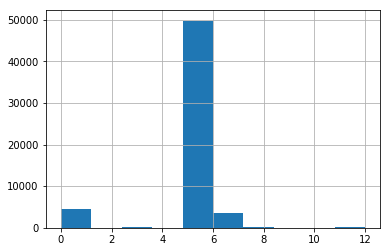

In [21]:
for_predict_df_prod['predict_rf'].hist()

In [22]:
for_predict_df_prod['predict_cb'].hist()